In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

### **Dataset Loading**

In [ ]:
path = "dataset4-2.csv"
df = pd.read_csv(path)

### **Dataset First View**

In [ ]:
df.head()

,cow,date,hour,IN_ALLEYS,REST,EAT,ACTIVITY_LEVEL,oestrus,calving,lameness,mastitis,LPS,acidosis,other_disease,accidents,disturbance,mixing,management_changes,OK
0,35687,2014-12-01,1,268.600,3288.426,42.973,-695.31332,0,0,0,0,NaN,NaN,0,0,0,0,0,1
1,35687,2014-12-01,2,169.599,3430.400,0.000,-761.85616,0,0,0,0,NaN,NaN,0,0,0,0,0,1
2,35687,2014-12-01,3,35.068,3564.931,0.000,-814.32325,0,0,0,0,NaN,NaN,0,0,0,0,0,1
3,35687,2014-12-01,4,0.000,3599.999,0.000,-827.99977,0,0,0,0,NaN,NaN,0,0,0,0,0,1
4,35687,2014-12-01,5,207.026,3392.973,0.000,-747.25963,0,0,0,0,NaN,NaN,0,0,0,0,0,1


### **Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  2177208
Number of columns are:  19


**Displaying Column Names**


In [ ]:

print(df.columns)

Index(['cow', 'date', 'hour', 'IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL',
       'oestrus', 'calving', 'lameness', 'mastitis', 'LPS', 'acidosis',
       'other_disease', 'accidents', 'disturbance', 'mixing',
       'management_changes', 'OK'],
      dtype='object')


In [ ]:
# Step 4: Define behavioral and health-related features
behavioral_features = ['IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL']
health_indicators = ['oestrus', 'calving', 'lameness', 'mastitis',
                     'other_disease', 'accidents', 'disturbance',
                     'mixing', 'management_changes', 'OK']

In [ ]:
target_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS', 'acidosis', 'other_disease', 'accidents', 'disturbance', 'mixing', 'management_changes', 'OK']


print("Unique Value Counts per Event:")
for col in target_columns:
    value_counts = df[col].value_counts()
    print(f"{col}:")
    print(value_counts)
    print("---------------------------------")

Unique Value Counts per Event:
oestrus:
oestrus
0    2171040
1       6168
Name: count, dtype: int64
---------------------------------
calving:
calving
0    2173104
1       4104
Name: count, dtype: int64
---------------------------------
lameness:
lameness
0    2174472
1       2736
Name: count, dtype: int64
---------------------------------
mastitis:
mastitis
0    2176440
1        768
Name: count, dtype: int64
---------------------------------
LPS:
Series([], Name: count, dtype: int64)
---------------------------------
acidosis:
Series([], Name: count, dtype: int64)
---------------------------------
other_disease:
other_disease
0    2175624
1       1584
Name: count, dtype: int64
---------------------------------
accidents:
accidents
0    2176848
1        360
Name: count, dtype: int64
---------------------------------
disturbance:
disturbance
0    1883856
1     293352
Name: count, dtype: int64
---------------------------------
mixing:
mixing
0    2177208
Name: count, dtype: int64
-------

### **Dataset Information**

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177208 entries, 0 to 2177207
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   cow                 int64  
 1   date                object 
 2   hour                int64  
 3   IN_ALLEYS           float64
 4   REST                float64
 5   EAT                 float64
 6   ACTIVITY_LEVEL      float64
 7   oestrus             int64  
 8   calving             int64  
 9   lameness            int64  
 10  mastitis            int64  
 11  LPS                 float64
 12  acidosis            float64
 13  other_disease       int64  
 14  accidents           int64  
 15  disturbance         int64  
 16  mixing              int64  
 17  management_changes  int64  
 18  OK                  int64  
dtypes: float64(6), int64(12), object(1)
memory usage: 315.6+ MB


### **Duplicate Values**





In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


### **Missing Values**


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

cow                         0
date                        0
hour                        0
IN_ALLEYS                   0
REST                        0
EAT                         0
ACTIVITY_LEVEL              0
oestrus                     0
calving                     0
lameness                    0
mastitis                    0
LPS                   2177208
acidosis              2177208
other_disease               0
accidents                   0
disturbance                 0
mixing                      0
management_changes          0
OK                          0
dtype: int64

**Missing values percentage**

In [ ]:
null_percentage = (df.isnull()).mean() * 100
print(null_percentage)

cow                     0.0
date                    0.0
hour                    0.0
IN_ALLEYS               0.0
REST                    0.0
EAT                     0.0
ACTIVITY_LEVEL          0.0
oestrus                 0.0
calving                 0.0
lameness                0.0
mastitis                0.0
LPS                   100.0
acidosis              100.0
other_disease           0.0
accidents               0.0
disturbance             0.0
mixing                  0.0
management_changes      0.0
OK                      0.0
dtype: float64


**Matrix of missing values**

<Figure size 1500x800 with 0 Axes>

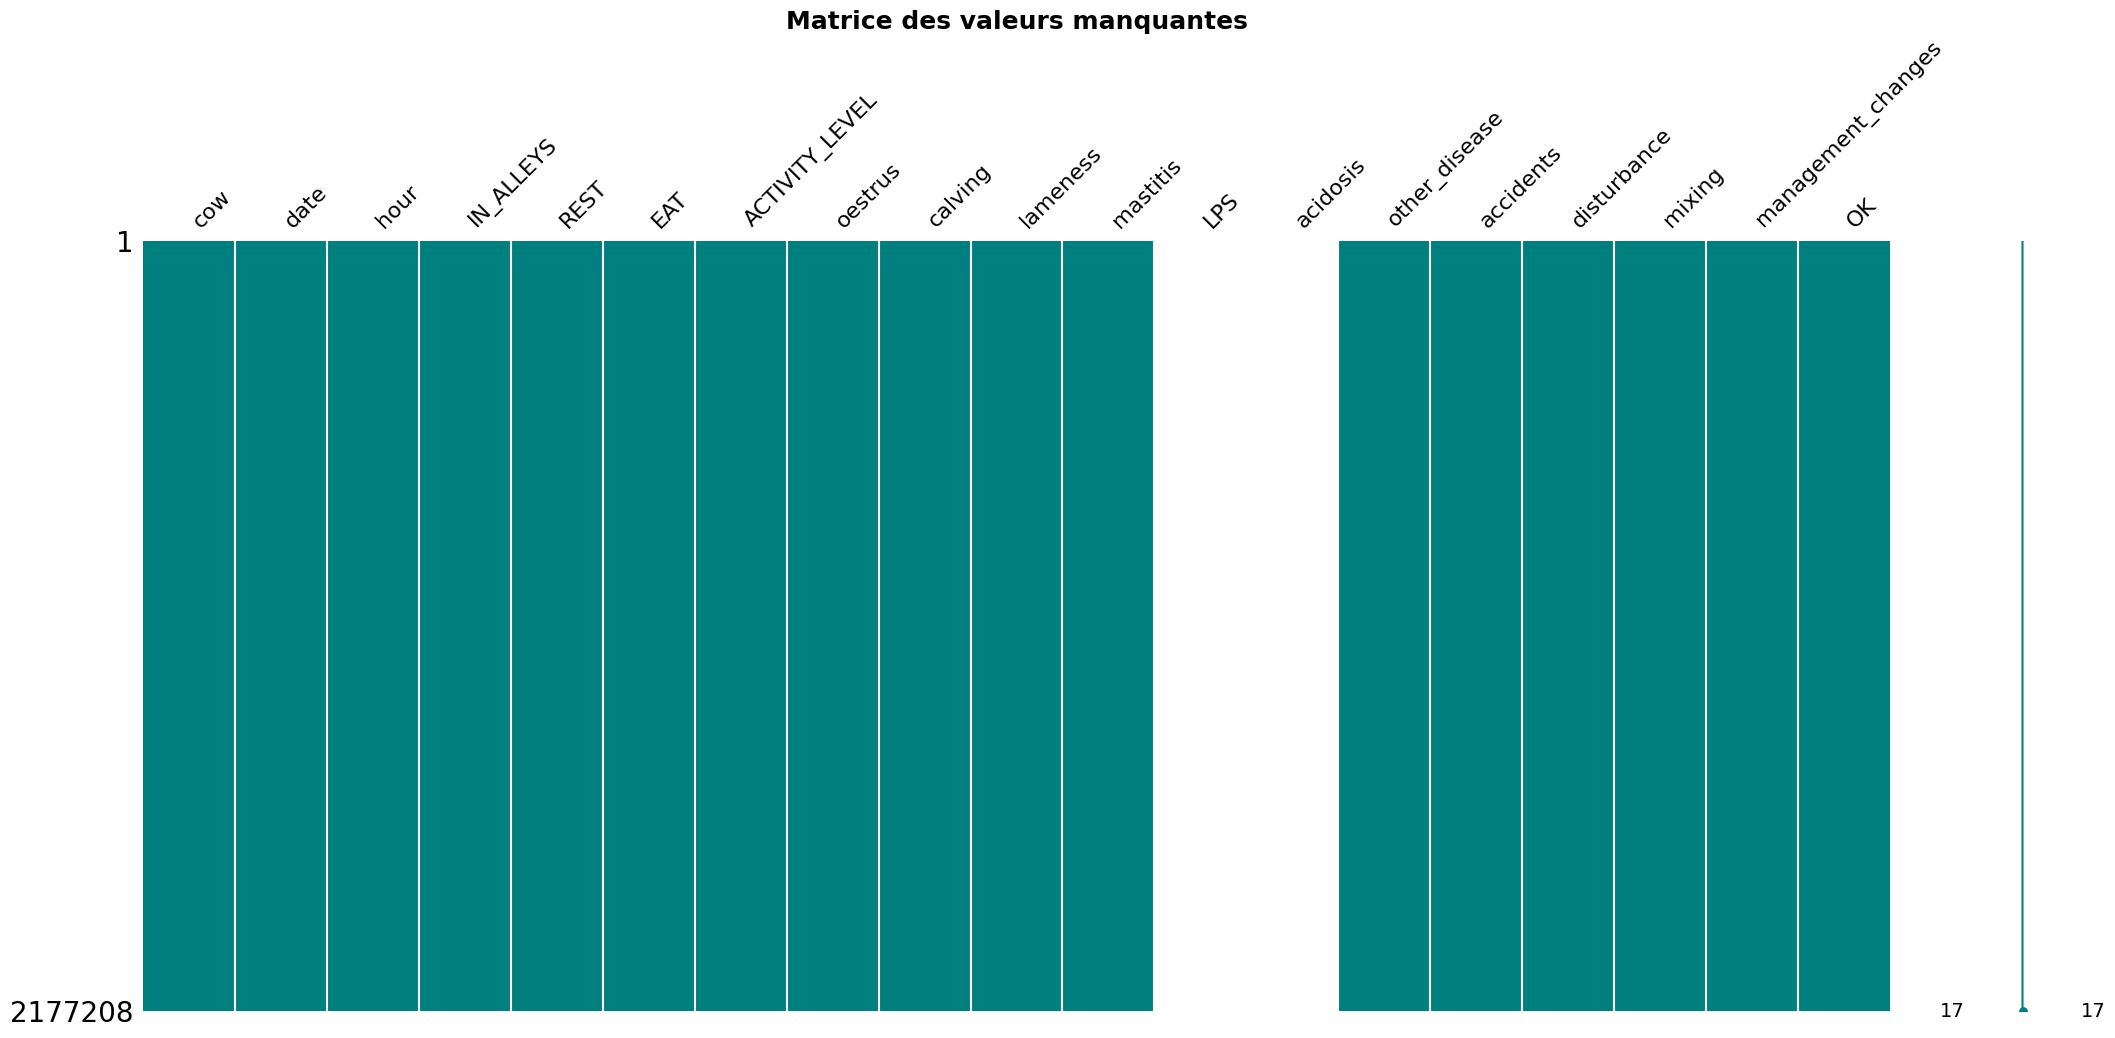

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt


data = pd.read_csv(path)


plt.figure(figsize=(15, 8))
msno.matrix(data, color=(0, 0.5, 0.5))  # Affichage des valeurs manquantes en matrice
plt.title("Matrice des valeurs manquantes", fontsize=18, fontweight='bold')
plt.show()

## **Null values**

In [ ]:
zero_counts = (df == 0).sum()
print(zero_counts)


cow                         0
date                        0
hour                        0
IN_ALLEYS              193638
REST                   210123
EAT                    893862
ACTIVITY_LEVEL             24
oestrus               2171040
calving               2173104
lameness              2174472
mastitis              2176440
LPS                         0
acidosis                    0
other_disease         2175624
accidents             2176848
disturbance           1883856
mixing                2177208
management_changes    2115264
OK                     305088
dtype: int64


**Null values percentage**

In [ ]:
zero_percentage = (df == 0).mean() * 100
print(zero_percentage)


cow                     0.000000
date                    0.000000
hour                    0.000000
IN_ALLEYS               8.893868
REST                    9.651030
EAT                    41.055425
ACTIVITY_LEVEL          0.001102
oestrus                99.716701
calving                99.811502
lameness               99.874334
mastitis               99.964725
LPS                     0.000000
acidosis                0.000000
other_disease          99.927246
accidents              99.983465
disturbance            86.526230
mixing                100.000000
management_changes     97.154888
OK                     14.012809
dtype: float64


## **Unique values**

In [ ]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in cow is 300
No. of unique values in date is 394
No. of unique values in hour is 24
No. of unique values in IN_ALLEYS is 1115261
No. of unique values in REST is 1236278
No. of unique values in EAT is 1038272
No. of unique values in ACTIVITY_LEVEL is 1579193
No. of unique values in oestrus is 2
No. of unique values in calving is 2
No. of unique values in lameness is 2
No. of unique values in mastitis is 2
No. of unique values in LPS is 0
No. of unique values in acidosis is 0
No. of unique values in other_disease is 2
No. of unique values in accidents is 2
No. of unique values in disturbance is 2
No. of unique values in mixing is 1
No. of unique values in management_changes is 2
No. of unique values in OK is 2


**Displaying Descriptive Statistics for Selected Columns**

In [ ]:
#removed LPS and Acidosis columns since they only contain NaN values
cols = ["lameness", "mastitis", "IN_ALLEYS", "REST", "EAT", "ACTIVITY_LEVEL",
        "other_disease", "accidents", "disturbance", "mixing",
        "management_changes", "OK"]


# Descriptive statistics for the selected columns
print(df[cols].describe())


           lameness      mastitis     IN_ALLEYS          REST           EAT  \
count  2.177208e+06  2.177208e+06  2.177208e+06  2.177208e+06  2.177208e+06   
mean   1.256655e-03  3.527454e-04  6.348595e+02  2.057854e+03  9.041302e+02   
std    3.542706e-02  1.877821e-02  7.382914e+02  1.364023e+03  1.126556e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  8.945275e+01  6.865583e+02  0.000000e+00   
50%    0.000000e+00  0.000000e+00  3.720965e+02  2.357526e+03  2.447950e+02   
75%    0.000000e+00  0.000000e+00  9.094053e+02  3.433507e+03  1.699438e+03   
max    1.000000e+00  1.000000e+00  3.599999e+03  3.599999e+03  3.599999e+03   

       ACTIVITY_LEVEL  other_disease     accidents   disturbance     mixing  \
count    2.177208e+06   2.177208e+06  2.177208e+06  2.177208e+06  2177208.0   
mean     8.005671e+00   7.275373e-04  1.653494e-04  1.347377e-01        0.0   
std      7.936820e+02   2.696309e-02  1.285776e-02 

**data distribution**

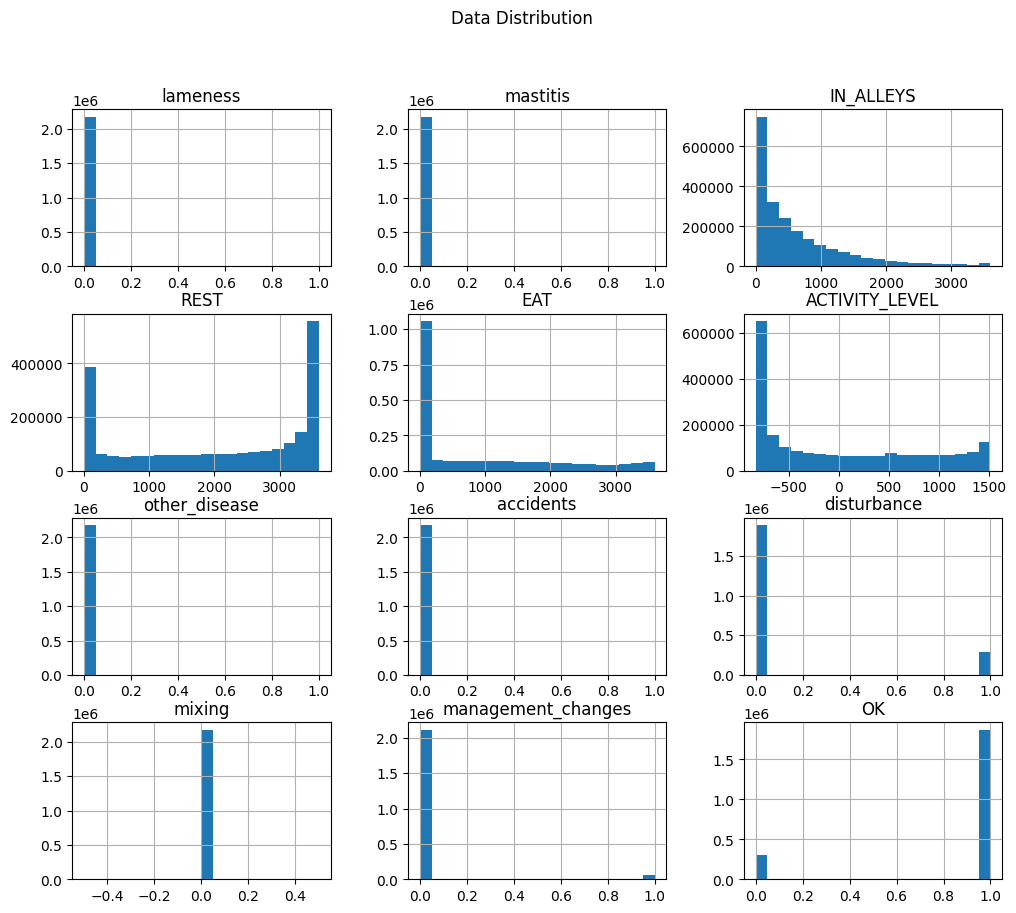

In [ ]:
# Plot histograms for the selected columns to understand their distributions
df[cols].hist(bins=20, figsize=(12, 10))
plt.suptitle("Data Distribution")
plt.show()


**Behavioral features Correlation**

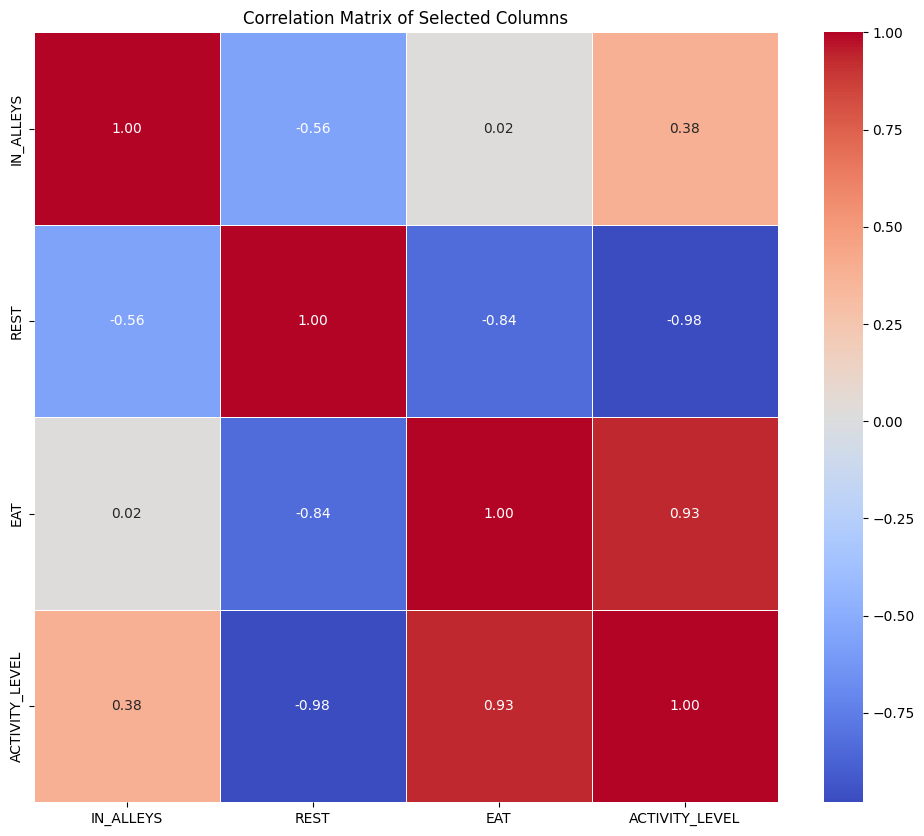

In [ ]:
# Select numeric columns for correlation calculation
cols = [ "IN_ALLEYS", "REST", "EAT", "ACTIVITY_LEVEL"]

df_numeric = df[cols].select_dtypes(include=['number'])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Columns")
plt.show()


**Check for outliers values**

Plage théorique : [-828, 1512]
Plage observée  : [-828.00, 1512.00]


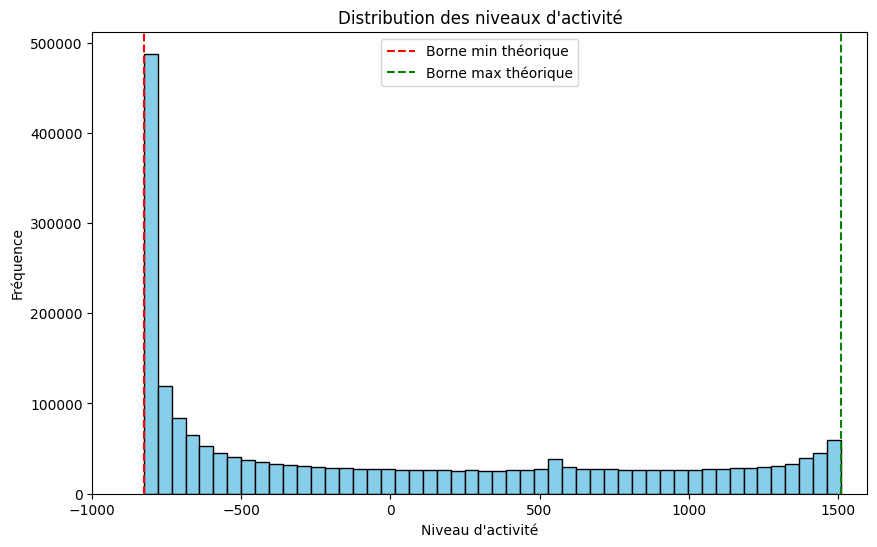


[ Rapport d'anomalies ]
- Valeurs hors plage théorique : 0 (0.00% du dataset)
- Aucune valeur hors plage détectée.


In [ ]:

min_theorique = -828
max_theorique = 1512

# Calculer les min/max observés
min_obs = df['ACTIVITY_LEVEL'].min()
max_obs = df['ACTIVITY_LEVEL'].max()

print(f"Plage théorique : [{min_theorique}, {max_theorique}]")
print(f"Plage observée  : [{min_obs:.2f}, {max_obs:.2f}]")

# Identifier les valeurs hors plage
outliers = df[(df['ACTIVITY_LEVEL'] < min_theorique) | (df['ACTIVITY_LEVEL'] > max_theorique)]
num_outliers = len(outliers)


plt.figure(figsize=(10, 6))
plt.hist(df['ACTIVITY_LEVEL'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=min_theorique, color='red', linestyle='--', label='Borne min théorique')
plt.axvline(x=max_theorique, color='green', linestyle='--', label='Borne max théorique')
plt.xlabel('Niveau d\'activité')
plt.ylabel('Fréquence')
plt.title('Distribution des niveaux d\'activité')
plt.legend()
plt.xlim(-1000, 1600)  # Pour mieux visualiser les éventuels outliers
plt.show()


print("\n[ Rapport d'anomalies ]")
print(f"- Valeurs hors plage théorique : {num_outliers} ({num_outliers/len(df)*100:.2f}% du dataset)")

if num_outliers > 0:
    print("- Exemples de lignes problématiques :")
    print(outliers[['DATETIME', 'ACTIVITY_LEVEL']].head())
else:
    print("- Aucune valeur hors plage détectée.")

**Target classes correlation**

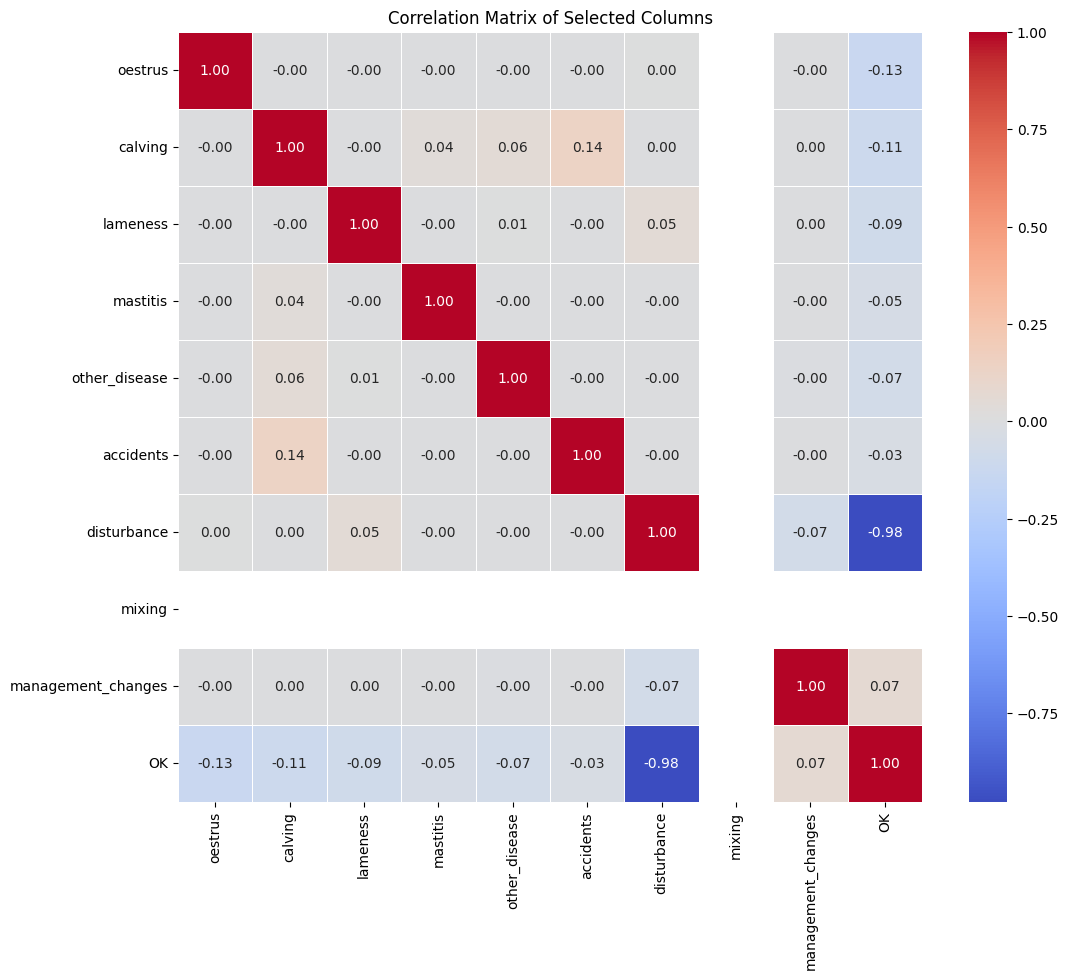

In [ ]:
# Select numeric columns for correlation calculation
cols = [
       'oestrus', 'calving', 'lameness', 'mastitis',
       'other_disease', 'accidents', 'disturbance', 'mixing',
       'management_changes', 'OK']

df_numeric = df[cols].select_dtypes(include=['number'])

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

**Behavioral features vs target classes correlation**

c:\Users\ghozz\anaconda3\envs\tensorflow\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ghozz\anaconda3\envs\tensorflow\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


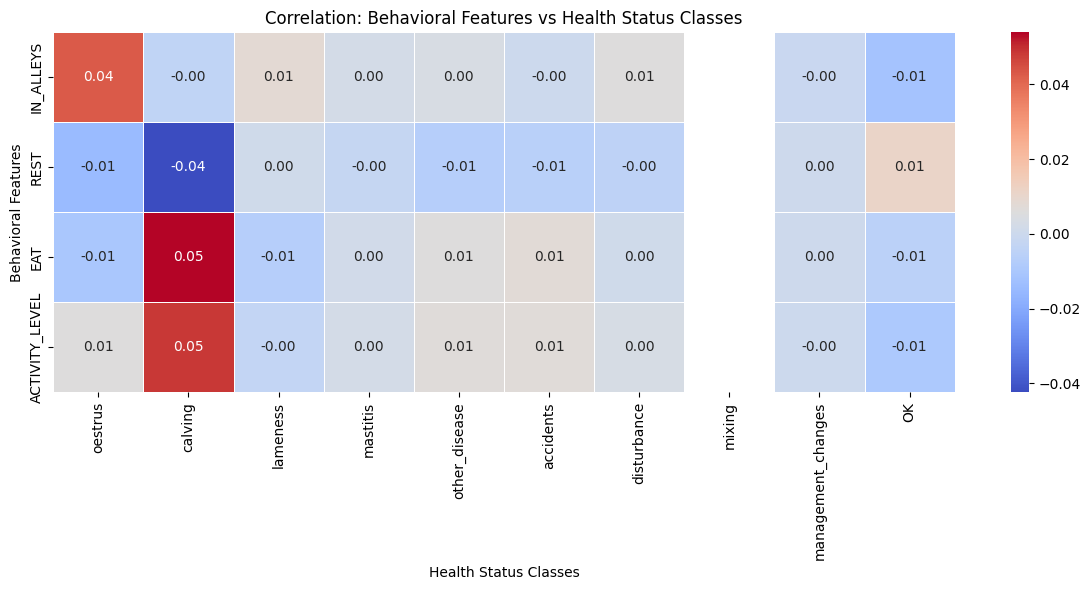

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Behavioral features
behavior_cols = ["IN_ALLEYS", "REST", "EAT", "ACTIVITY_LEVEL"]

# Health status target classes
target_cols = [
    'oestrus', 'calving', 'lameness', 'mastitis',
    'other_disease', 'accidents', 'disturbance', 'mixing',
    'management_changes', 'OK'
]


behavior_df = df[behavior_cols].select_dtypes(include='number')
target_df = df[target_cols].select_dtypes(include='number')

# Compute correlation between behavior and target columns
corr_matrix = behavior_df.corrwith(target_df, axis=0)  # This gives a Series, but not a full matrix


full_corr_matrix = behavior_df.corrwith(target_df, axis=0)
full_corr_matrix = pd.DataFrame(index=behavior_cols, columns=target_cols)

for b_col in behavior_cols:
    for t_col in target_cols:
        full_corr_matrix.loc[b_col, t_col] = df[b_col].corr(df[t_col])

full_corr_matrix = full_corr_matrix.astype(float)


plt.figure(figsize=(12, 6))
sns.heatmap(full_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation: Behavioral Features vs Health Status Classes")
plt.xlabel("Health Status Classes")
plt.ylabel("Behavioral Features")
plt.tight_layout()
plt.show()



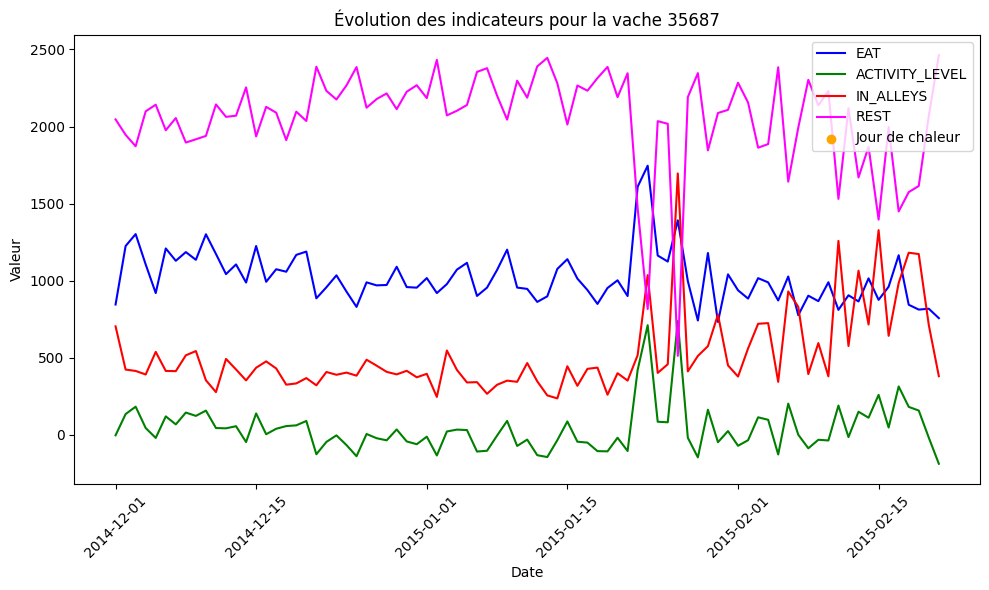

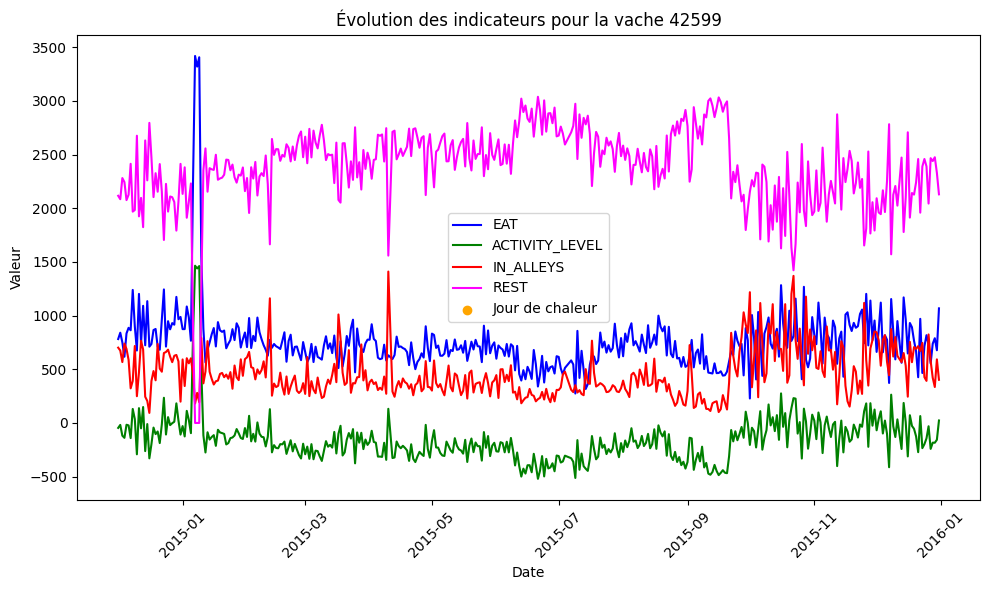

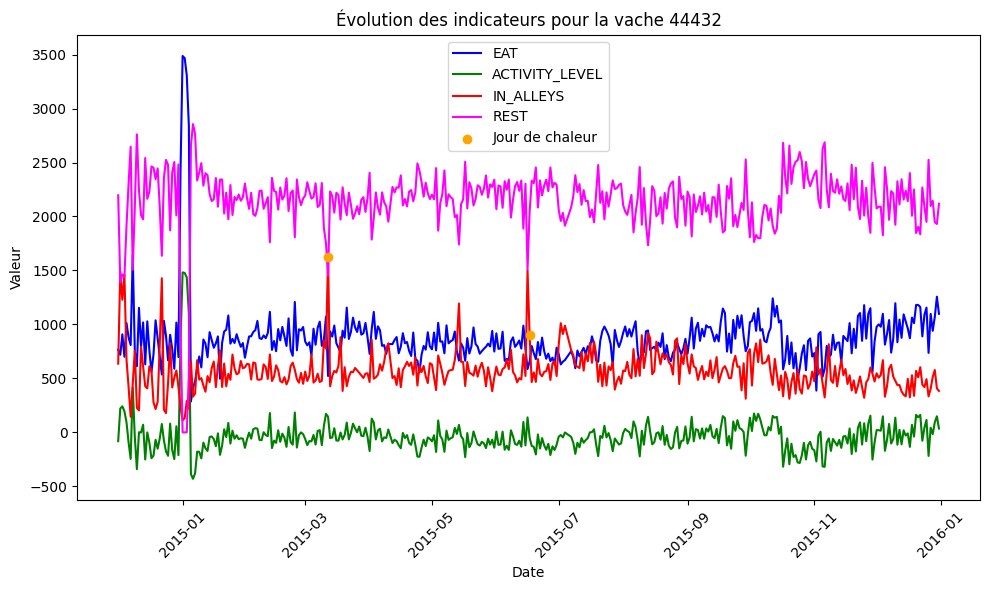

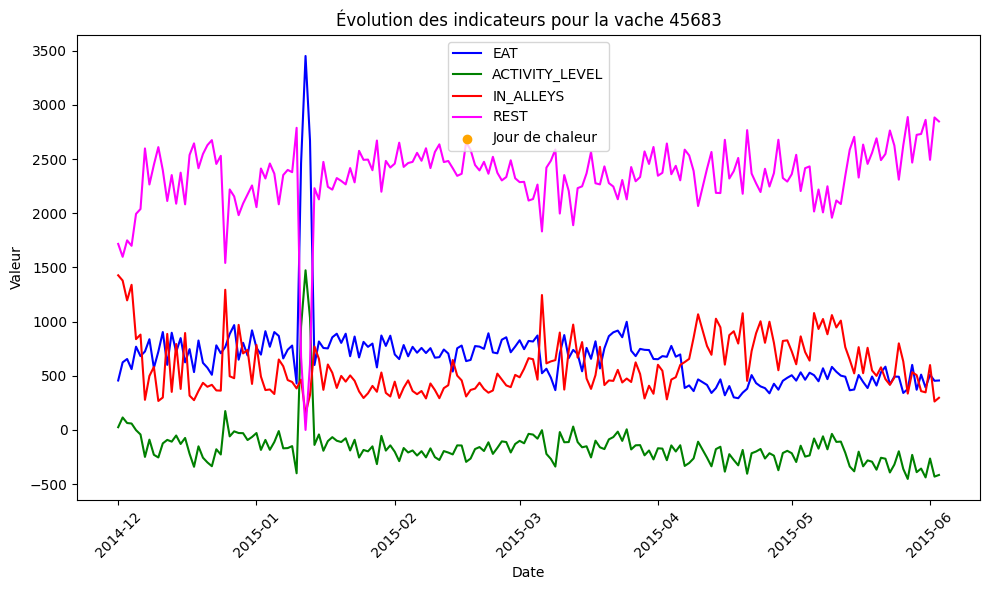

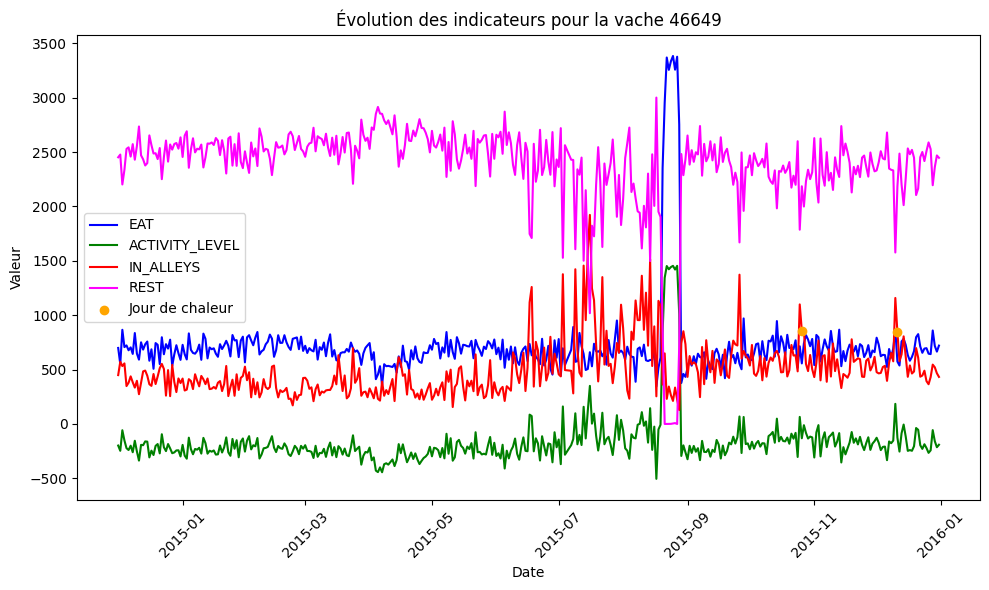

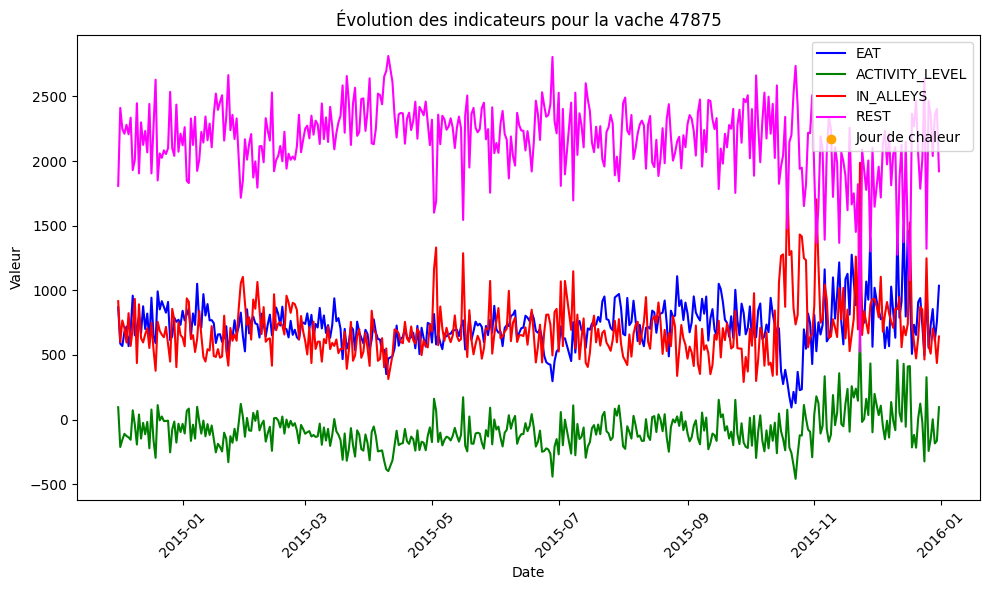

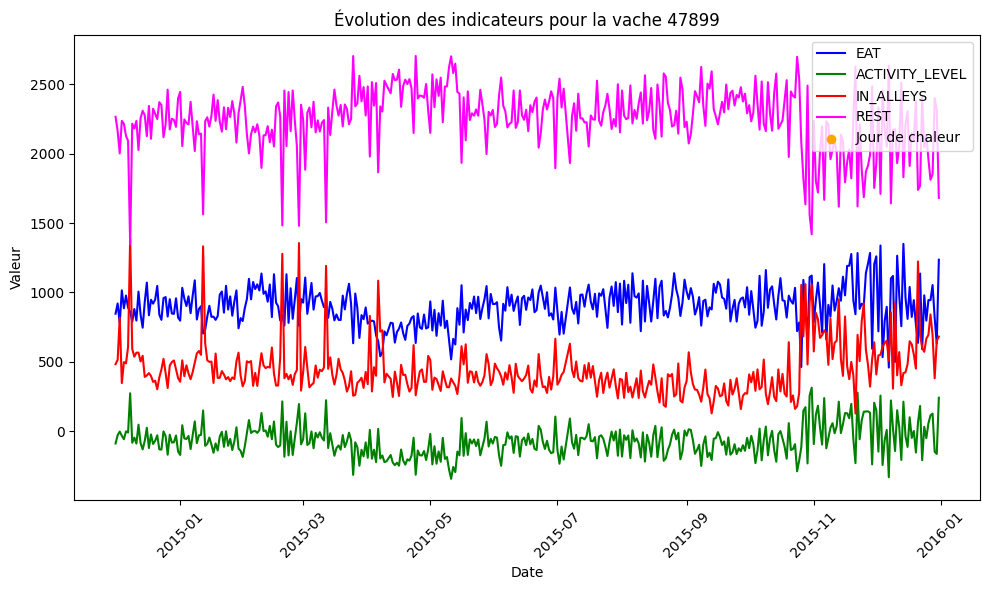

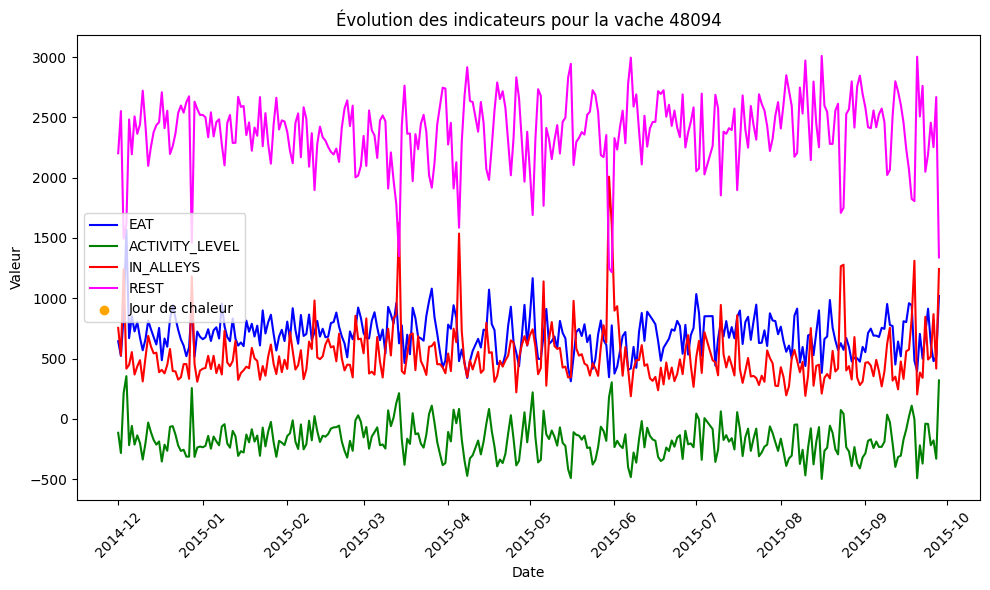

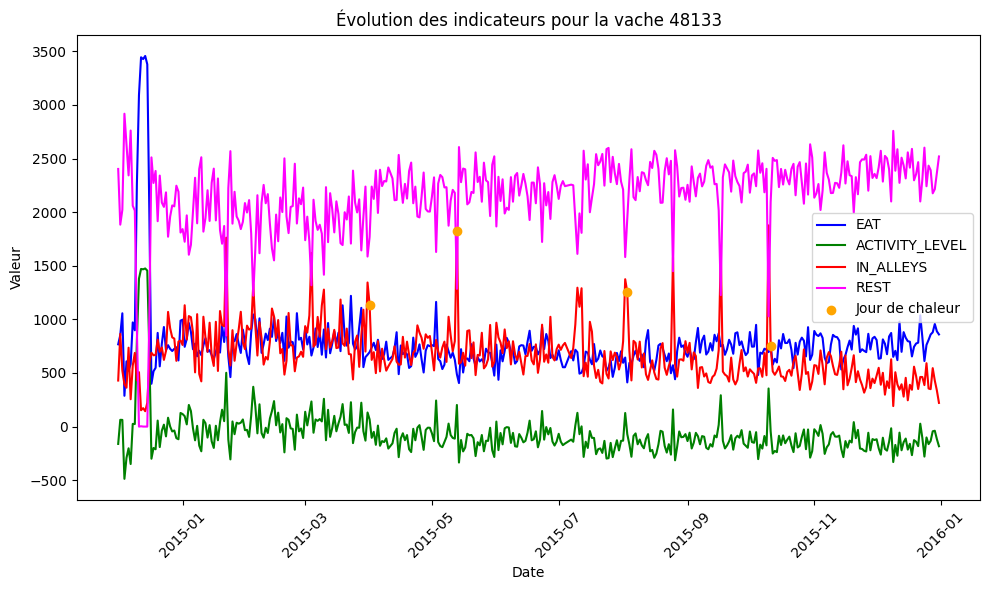

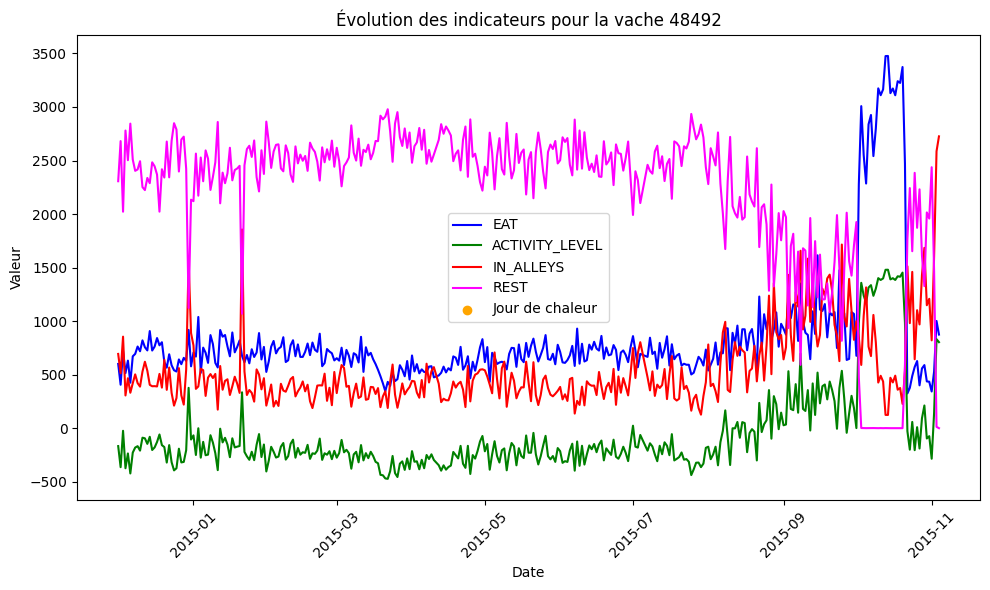

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['date'] = pd.to_datetime(df['date'])

# Calculer la moyenne par jour pour chaque vache
df_grouped = df.groupby(['cow', 'date']).agg({
    'ACTIVITY_LEVEL': 'mean',
    'EAT': 'mean',
    'IN_ALLEYS': 'mean',
    'REST': 'mean',
}).reset_index()

df_grouped['is_heat'] = df.groupby(['cow', 'date'])['oestrus'].max().reset_index()['oestrus'].apply(lambda x: 1 if x == 1 else 0)

# Sélectionner 10 vaches
sample_vaches = df_grouped['cow'].unique()[:10]

for cow_id in sample_vaches:
    cow_data = df_grouped[df_grouped['cow'] == cow_id]

    plt.figure(figsize=(10, 6))

    # Tracer 'EAT'
    plt.plot(cow_data['date'], cow_data['EAT'], label='EAT', color='blue')

    # Tracer 'ACTIVITY_LEVEL'
    plt.plot(cow_data['date'], cow_data['ACTIVITY_LEVEL'], label='ACTIVITY_LEVEL', color='green')

    # Tracer 'IN_ALLEYS'
    plt.plot(cow_data['date'], cow_data['IN_ALLEYS'], label='IN_ALLEYS', color='red')
      # Tracer 'REST'
    plt.plot(cow_data['date'], cow_data['REST'], label='REST', color='magenta')

    # Marquer les jours de chaleur (oestrus == 1)
    plt.scatter(cow_data[cow_data['is_heat'] == 1]['date'],
                cow_data[cow_data['is_heat'] == 1]['IN_ALLEYS'],

                color='orange', label='Jour de chaleur', zorder=5)

    plt.title(f'Évolution des indicateurs pour la vache {cow_id}')
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [ ]:
# Step 5: Define RMSE function
def rmse(x):
    return np.sqrt(np.mean(np.square(x)))

In [ ]:
# Step 6: Daily aggregation function
def aggregate_daily_stats(group):
    stats = {}
    for col in behavioral_features:
        stats[f'{col}_min'] = group[col].min()
        stats[f'{col}_std'] = group[col].std()
        stats[f'{col}_q25'] = group[col].quantile(0.25)
        stats[f'{col}_q50'] = group[col].quantile(0.50)
        stats[f'{col}_q75'] = group[col].quantile(0.75)
        stats[f'{col}_rmse'] = rmse(group[col])
    for col in health_indicators:
        stats[col] = group[col].max()  # max to detect if event happened
    return pd.Series(stats)

C:\Users\ghozz\AppData\Local\Temp\ipykernel_22920\3011296649.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_aggregated = df.groupby(['cow', 'date']).apply(aggregate_daily_stats).reset_index()


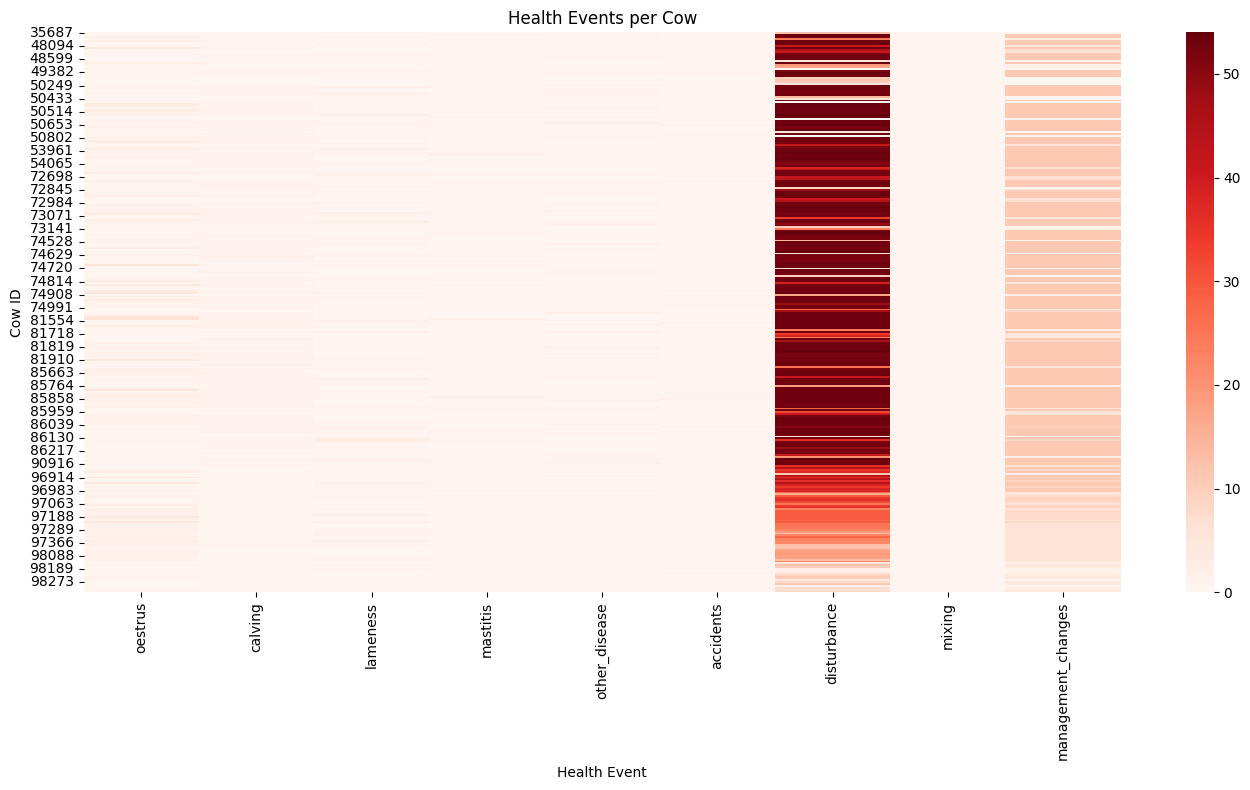

In [ ]:
# Step 7: Aggregate by cow and date
daily_aggregated = df.groupby(['cow', 'date']).apply(aggregate_daily_stats).reset_index()
health_cols = ['oestrus', 'calving', 'lameness', 'mastitis', 'other_disease',
               'accidents', 'disturbance', 'mixing', 'management_changes' ]

event_matrix = daily_aggregated.groupby('cow')[health_cols].sum()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(event_matrix, cmap='Reds', annot=False)
plt.title('Health Events per Cow')
plt.xlabel('Health Event')
plt.ylabel('Cow ID')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Calcul des totaux
total_cells = df.size
null_count = df.isnull().sum().sum()
zero_count = (df == 0).sum().sum()

# Pourcentages globaux
null_percentage = (null_count / total_cells) * 100
zero_percentage = (zero_count / total_cells) * 100

# Affichage des résultats
print(f"Analyse Globale du Dataset ({df.shape[0]} lignes × {df.shape[1]} colonnes):")
print(f"1. Nombre total de cellules: {total_cells}")
print(f"2. Valeurs NULL: {null_count} ({null_percentage:.2f}%)")
print(f"3. Valeurs ZÉRO: {zero_count} ({zero_percentage:.2f}%)")
print(f"4. Cellules remplies (non-null et non-zero): {total_cells - null_count - zero_count} ({100 - null_percentage - zero_percentage:.2f}%)")

Analyse Globale du Dataset (179759 lignes × 19 colonnes):
1. Nombre total de cellules: 3415421
2. Valeurs NULL: 359518 (10.53%)
3. Valeurs ZÉRO: 1739591 (50.93%)
4. Cellules remplies (non-null et non-zero): 1316312 (38.54%)


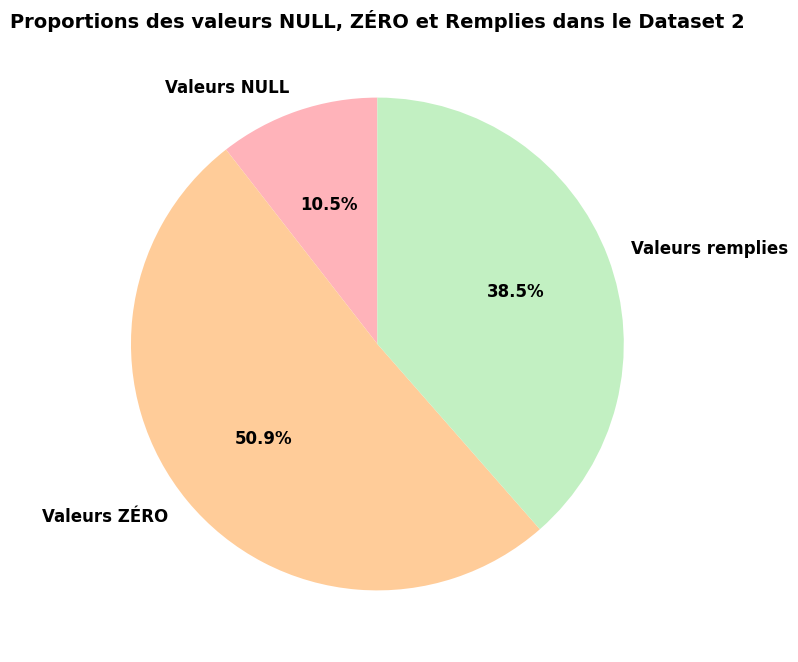

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    'Valeurs NULL': null_count,
    'Valeurs ZÉRO': zero_count,
    'Valeurs remplies': total_cells - null_count - zero_count,
}

# Pie chart with beautiful pastel colors
labels = list(data.keys())
sizes = list(data.values())
colors = ['#ffb3ba', '#ffcc99', '#c2f0c2']  # Soft pastel colors

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Proportions des valeurs NULL, ZÉRO et Remplies dans le Dataset 2', fontsize=14, fontweight='bold')
plt.show()
